<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1102_Pca_cont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist as fm
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fm.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


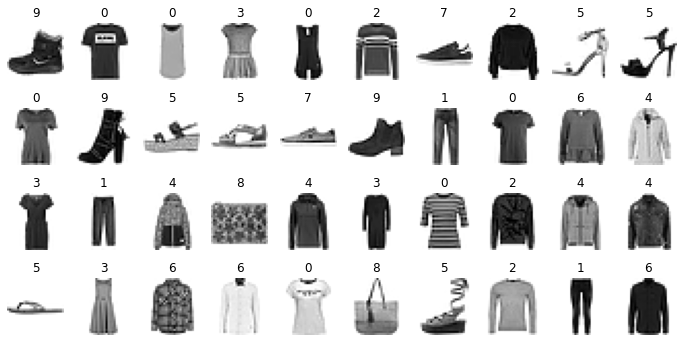

In [4]:
fig = plt.figure(figsize=(12, 6))
for i, im in enumerate(x_train[:40]):
    a = fig.add_subplot(4, 10, i + 1)
    plt.axis('off')
    plt.imshow(im, cmap='gray_r')
    plt.title(y_train[i])
plt.show()

In [5]:
x_train = x_train / 255.
x_test = x_test / 255.

In [6]:
m, r, c = x_train.shape
x_train = x_train.reshape((m, r*c))
m, r, c = x_test.shape
x_test = x_test.reshape((m, r*c))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
model = keras.Sequential(
    [layers.Dense(64, input_dim=r*c, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(128, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6115 - accuracy: 0.7786
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4558 - accuracy: 0.8342
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4180 - accuracy: 0.8485
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4020 - accuracy: 0.8538
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3860 - accuracy: 0.8598
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3763 - accuracy: 0.8606
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3673 - accuracy: 0.8661
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3580 - accuracy: 0.8682
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3495 - accuracy: 0.8728
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.34

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x_train)

In [11]:
dim = len(pca.explained_variance_ratio_)
dim

187

In [12]:
model = keras.Sequential(
    [layers.Dense(64, input_dim=dim, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(128, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                12032     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 21,642
Trainable params: 21,642
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_reduced, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5823 - accuracy: 0.7947
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4134 - accuracy: 0.8526
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3765 - accuracy: 0.8656
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3546 - accuracy: 0.8726
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3393 - accuracy: 0.8767
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3309 - accuracy: 0.8800
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3203 - accuracy: 0.8827
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3184 - accuracy: 0.8843
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3104 - accuracy: 0.8861
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.305

In [14]:
x_recovered = pca.inverse_transform(x_reduced)

In [15]:
x_recovered.shape

(60000, 784)

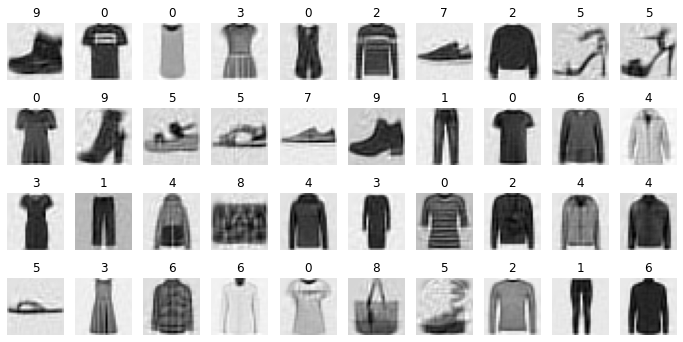

In [16]:
fig = plt.figure(figsize=(12, 6))
x_recovered = x_recovered.reshape((60000, 28, 28))
for i, im in enumerate(x_recovered[:40]):
    a = fig.add_subplot(4, 10, i + 1)
    plt.axis('off')
    plt.imshow(im, cmap='gray_r')
    plt.title(y_train[i])
plt.show()

In [17]:
784**0.5

28.0

## PCA randomizado

Debe ser más rápido bajo las consiciones adecuadas, pero necesita designar de antemano las dimensiones a utilizar

In [18]:
pca = PCA(n_components=187, svd_solver='randomized')
x_reduced = pca.fit_transform(x_train)

## Kernel PCA

In [19]:
from sklearn.decomposition import KernelPCA

In [20]:
rbf_pca = KernelPCA(n_components=50, kernel="rbf", gamma=0.04)
x_reduced = rbf_pca.fit_transform(x_test)

In [23]:
model = keras.Sequential(
    [layers.Dense(64, input_dim=50, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(128, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                3264      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 12,874
Trainable params: 12,874
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(x_reduced, y_test, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 1.3432 - accuracy: 0.6103
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.6951 - accuracy: 0.7569
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.6375 - accuracy: 0.7753
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.6130 - accuracy: 0.7797
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5884 - accuracy: 0.7861
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5723 - accuracy: 0.7921
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5671 - accuracy: 0.7980
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5533 - accuracy: 0.7999
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5434 - accuracy: 0.8009
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5355 - accuracy: 0.8027